In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.precision", 3)

In [3]:
# Load dataset
mustard = pd.read_csv("Mustard.csv", index_col=False, header=0) 

In [4]:
mustard

,weight,light,watering,medium
0,2.02,normal,1,soil
1,0.30,normal,1,cottonwool
2,0.27,normal,1,newspaper
3,0.09,normal,1,sawdust
4,2.04,normal,1,soil
...,...,...,...,...
103,2.36,green,5,sawdust
104,4.56,green,5,soil
105,2.30,green,5,cottonwool
106,2.40,green,5,newspaper


In [5]:
mustard.dropna(subset = ["weight"], inplace=True)
mustard.dropna(subset = ["light"], inplace=True)
mustard.dropna(subset = ["watering"], inplace=True)
mustard.dropna(subset = ["medium"], inplace=True)

In [6]:
mustard.describe()

,weight,watering
count,105.000,105.000
mean,1.879,2.981
std,1.222,1.652
min,0.060,1.000
25%,0.980,1.000
50%,1.780,3.000
75%,2.400,5.000
max,5.600,5.000


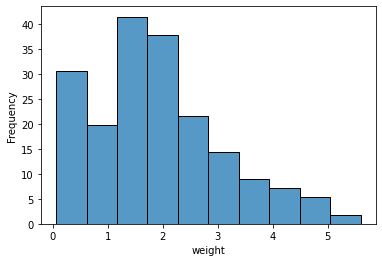

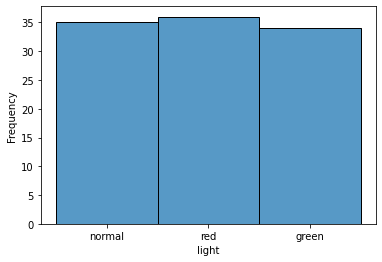

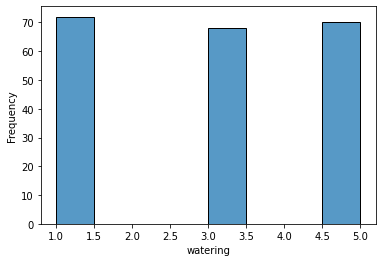

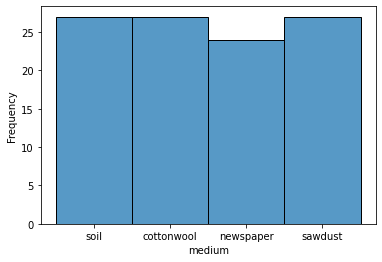

In [7]:
for column in mustard.columns:
    sns.histplot(data=mustard[column], stat="frequency")
    plt.show()

According to description of dataset 'watering', 'medium' and 'light' indeed have the same amount of combination 
At the end of analysis the most frequent weight is 1.5

In [8]:
means = []
amount_df = -1
for medium in mustard['medium'].unique():
    for watering in mustard['watering'].unique():
        for light in mustard['light'].unique():
            df = mustard[(mustard['medium'] == medium) & (mustard['watering'] == watering) & (mustard['light'] == light)]
            amount_df += 1
            print(f'DataFrame {amount_df} with medium = {medium}, watering = {watering}, light = {light} \n{df}')
            print(f'Mean of variable weight: \n{df.weight.mean():.{3}f}\n')
            means.append(round(df.weight.mean(), 3))

DataFrame 0 with medium = soil, watering = 1, light = normal 
   weight   light  watering medium
0    2.02  normal         1   soil
4    2.04  normal         1   soil
8    1.63  normal         1   soil
Mean of variable weight: 
1.897

DataFrame 1 with medium = soil, watering = 1, light = red 
    weight light  watering medium
36   3.345   red         1   soil
40   1.940   red         1   soil
44   4.640   red         1   soil
Mean of variable weight: 
3.308

DataFrame 2 with medium = soil, watering = 1, light = green 
    weight  light  watering medium
72    3.26  green         1   soil
76    3.37  green         1   soil
80    2.13  green         1   soil
Mean of variable weight: 
2.920

DataFrame 3 with medium = soil, watering = 3, light = normal 
    weight   light  watering medium
12    3.90  normal         3   soil
16    2.28  normal         3   soil
20    2.69  normal         3   soil
Mean of variable weight: 
2.957

DataFrame 4 with medium = soil, watering = 3, light = red 
    w

In [9]:
import operator
index, value = max(enumerate(means), key=operator.itemgetter(1))
print(f'Number of DataFrame: {index}, mean: {value}')

Number of DataFrame: 8, mean: 4.567


In [10]:
means_df = pd.DataFrame({'Mean of Weight': means})
means_df['Num of DF'] = means_df.index
cols = means_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
means_df = means_df[cols]
means_df.head()

,Num of DF,Mean of Weight
0,0,1.897
1,1,3.308
2,2,2.920
3,3,2.957
4,4,2.993


<AxesSubplot:xlabel='Num of DF'>

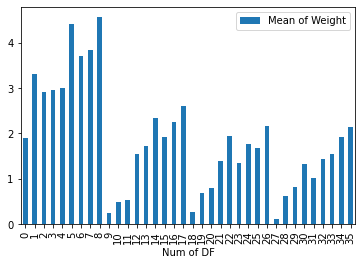

In [11]:
means_df.plot.bar(x='Num of DF', y='Mean of Weight')

### so the most effective combination of factors are for 8th DF: medium = soil, watering = 5, light = green 

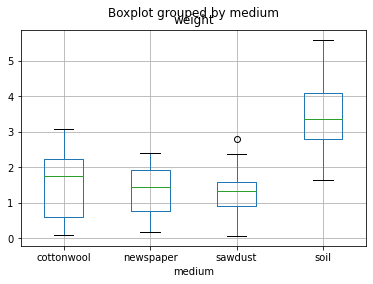

In [12]:
boxplot = mustard.boxplot(column="weight", by="medium")

In [13]:
from scipy.stats import iqr
from statsmodels.stats.weightstats import ttest_ind
# Compute summary statistics for each group (single and team)
tab = mustard.groupby("medium")["weight"].agg(n=len, 
                                               mean=np.mean, 
                                               median=np.median,
                                               sd=np.std,
                                               iqr=iqr,
                                               min=min,
                                               max=max)
print(tab)

               n   mean  median     sd    iqr   min   max
medium                                                   
cottonwool  27.0  1.520    1.74  0.875  1.635  0.10  3.08
newspaper   24.0  1.318    1.45  0.702  1.157  0.17  2.40
sawdust     27.0  1.214    1.33  0.703  0.655  0.06  2.81
soil        27.0  3.401    3.37  0.997  1.290  1.63  5.60


### as we can see the mustard with soil medium weight more than others 

In [14]:
x1 = mustard[mustard['medium']=='soil']['weight']
for medium in mustard['medium'].unique():
    if medium != 'soil':
        x2 = mustard[mustard['medium']==medium]['weight']
        ttest = ttest_ind(x1=x1, x2=x2, alternative="larger", usevar="pooled")
        print(f"soil > {medium}: t = {ttest[0]:.1f}, p-value = {ttest[1]:.1g}, df = {ttest[2]:.0f}")

soil > cottonwool: t = 7.4, p-value = 6e-10, df = 52
soil > newspaper: t = 8.5, p-value = 2e-11, df = 49
soil > sawdust: t = 9.3, p-value = 6e-13, df = 52


In [15]:
from statsmodels.stats.oneway import anova_oneway
res = anova_oneway(data=mustard["weight"], groups=mustard["medium"], use_var='equal', welch_correction=False)
print(res)

statistic = 41.154629443450276
pvalue = 1.8460477843877034e-17
df = (3.0, 101.0)
df_num = 3.0
df_denom = 101.0
nobs_t = 105.0
n_groups = 4
means = [1.52       1.31791667 1.21444444 3.40074074]
nobs = [27. 24. 27. 27.]
vars_ = [0.76597692 0.49217373 0.49478718 0.99345905]
use_var = equal
welch_correction = False
tuple = (41.154629443450276, 1.8460477843877034e-17)


### indeed, I did 2 sample test and anova test with k samples and it shows that mustard grows better in soil medium